# A Hands-on Tutorial on Open-Source Research in Structural Dynamics and Image-Based Experimental Modal Analysis

**Klemen Zaletelj$^a$, Domen Gorjup$^a$ and Janko Slavič$^a$\***

$^a$ Faculty of Mechanical Engineering, University of Ljubljana

\* Corresponding email: janko.slavic@fs.uni-lj.si

www.ladisk.si

---

# `github.com/ladisk/open_source_research_in_structural_dynamics`

---

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Open-source-concepts-in-scientific-research" data-toc-modified-id="Open-source-concepts-in-scientific-research-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Open-source concepts in scientific research</a></span></li><li><span><a href="#Open-source-tools-for-structural-dynamics" data-toc-modified-id="Open-source-tools-for-structural-dynamics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Open-source tools for structural dynamics</a></span><ul class="toc-item"><li><span><a href="#SciPy" data-toc-modified-id="SciPy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><a href="https://www.scipy.org/" target="_blank">SciPy</a></a></span></li><li><span><a href="#PyFRF" data-toc-modified-id="PyFRF-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyFRF" target="_blank">PyFRF</a></a></span></li><li><span><a href="#PyEMA" data-toc-modified-id="PyEMA-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyEMA" target="_blank">PyEMA</a></a></span></li><li><span><a href="#PyIDI" data-toc-modified-id="PyIDI-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><a href="https://github.com/ladisk/pyidi" target="_blank">PyIDI</a></a></span></li><li><span><a href="#FLife" data-toc-modified-id="FLife-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><a href="https://github.com/ladisk/FLife" target="_blank">FLife</a></a></span></li><li><span><a href="#PyUFF" data-toc-modified-id="PyUFF-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><a href="https://github.com/openmodal/pyuff" target="_blank">PyUFF</a></a></span></li></ul></li><li><span><a href="#High-speed-camera-measurements-in-structural-dynamics" data-toc-modified-id="High-speed-camera-measurements-in-structural-dynamics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>High-speed camera measurements in structural dynamics</a></span><ul class="toc-item"><li><span><a href="#Acquisition-parameters" data-toc-modified-id="Acquisition-parameters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Acquisition parameters</a></span></li><li><span><a href="#Lighting" data-toc-modified-id="Lighting-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Lighting</a></span></li><li><span><a href="#Surface-preperation" data-toc-modified-id="Surface-preperation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Surface preperation</a></span></li><li><span><a href="#Possible-errors" data-toc-modified-id="Possible-errors-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Possible errors</a></span><ul class="toc-item"><li><span><a href="#Out-of-focus-image" data-toc-modified-id="Out-of-focus-image-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Out of focus image</a></span></li><li><span><a href="#Improper-lighting" data-toc-modified-id="Improper-lighting-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Improper lighting</a></span></li></ul></li></ul></li><li><span><a href="#Real-life-example-of-image-based-vibration-measurement" data-toc-modified-id="Real-life-example-of-image-based-vibration-measurement-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Real-life example of image-based vibration measurement</a></span><ul class="toc-item"><li><span><a href="#Image-based-displacement-computation" data-toc-modified-id="Image-based-displacement-computation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Image-based displacement computation</a></span></li><li><span><a href="#Modal-Analysis---camera-data,-only" data-toc-modified-id="Modal-Analysis---camera-data,-only-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Modal Analysis - camera data, only</a></span></li><li><span><a href="#Modal-Analysis---Hybrid-method" data-toc-modified-id="Modal-Analysis---Hybrid-method-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Modal Analysis - Hybrid method</a></span></li></ul></li></ul></div>

To run this tutorial, the following Python packages must be installed:

* ``pip install scipy``
* ``pip install numpy``
* ``pip install matplotlib``
* ``pip install lvm_read``
* ``pip install lvm_read``
* ``pip install pyFRF``
* ``pip install pyidi``
* ``pip install pyEMA``
* ``pip install FLifr``
* ``pip install pyuff``

You can get them all at once by running:

``pip install -r requirements.txt``

Package imports:

*(Some of these might be imported again in the examples below. While this is not a recommended practice, it is done to provide you with complete code examples).*

In [1]:
# General Python packages
import os
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, fixed

# Structural dynamics packages
import lvm_read
import pyFRF
import pyidi
import pyEMA
import FLife
import pyuff

# Our visualization functions
from modules.tools import show_modal_data, plot_mode_shape, show_reconstructed, show_lighting

# Ignore non-critical warnings
import warnings
warnings.filterwarnings('ignore')

Plotting settings:

In [2]:
%matplotlib inline

font_size = 15
fig_size = (16.0, 8.0)

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = fig_size
matplotlib.rcParams['font.size'] = font_size

---

## Open-source concepts in scientific research

---

## Open-source tools for structural dynamics

### [SciPy](https://www.scipy.org/)

The [SciPy](https://www.scipy.org/index.html) stack is a collection of open-source Python software for science and engineering. It consists of six core packages, including:

**[Numpy](http://www.numpy.org/)**: 

* Adds support for the efficient multidimentional ``ndarray`` data object for numerical data representation. 
* Functions for *numerical data manipulation*, *linear algebra* and *the Fourier transform*.

In [3]:
import numpy as np

In [4]:
L = [1, 2, 3, 4, 5] # This is a list
a = np.array(L)     # This is an array
a

array([1, 2, 3, 4, 5])

Note the difference:

In [5]:
2*L

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [6]:
2*a

array([ 2,  4,  6,  8, 10])

A range of numbers:

In [7]:
a1 = np.arange(0, 10, 2)
a1

array([0, 2, 4, 6, 8])

Linearly spaced values:

In [8]:
a2 = np.linspace(0, 10, 6, dtype=complex)
a2

array([ 0.+0.j,  2.+0.j,  4.+0.j,  6.+0.j,  8.+0.j, 10.+0.j])

Multidimensional arrays represent matrices:

In [9]:
M = np.random.rand(3, 3) # This is a matrix
M

array([[0.89119556, 0.93778321, 0.74666858],
       [0.09675022, 0.30354982, 0.63327404],
       [0.78413337, 0.45303302, 0.95371026]])

**[Matplotlib](https://matplotlib.org/)**:

* A plotting library for producing publication-ready data visualizations.
* A MATLAB-inspired user interface.


In [10]:
import matplotlib.pyplot as plt

In [11]:
x = np.arange(0, 1, 0.02) # x coordinates
y1 = np.sin(2*np.pi*2*x)   # y coordinates
y2 = np.cos(2*np.pi*3*x)   # y coordinates

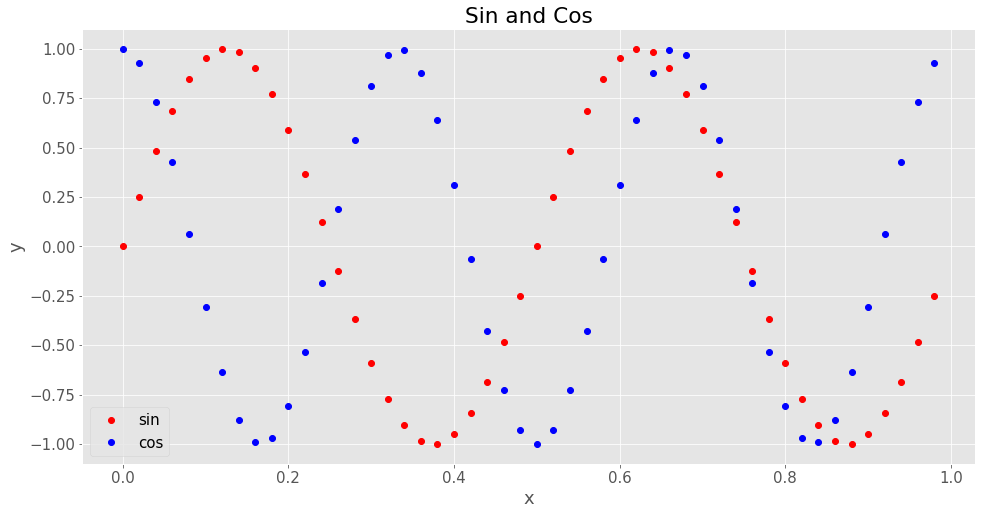

In [12]:
plt.plot(x, y1, 'ro', label='sin')
plt.plot(x, y2, 'bo', label='cos')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin and Cos')
plt.grid(True)

(Outside the Jupyter environment, things are a bit different! Some extra lines of code are required.)

**[The SciPy library](https://docs.scipy.org/doc/scipy/reference/)** provides user-friendly and efficient numerical routines for:

* Signal processing,
* numerical integration,
* optimization,
* interpolation.

In [13]:
from scipy.interpolate import InterpolatedUnivariateSpline

In [14]:
x_int = np.linspace(0, 1, 1000)
spl = InterpolatedUnivariateSpline(x, y1, k=3)

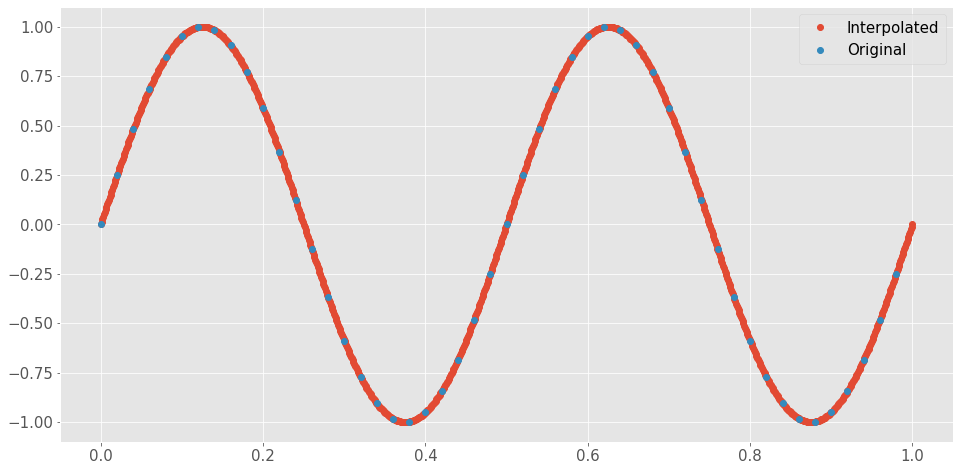

In [15]:
plt.plot(x_int, spl(x_int), 'o', label='Interpolated')
plt.plot(x, y1, 'o', label='Original')
plt.legend()

The Discrete Fourier Transform is included in both Numpy and SciPy:

In [16]:
Y1 = np.fft.rfft(y1) / len(x) * 2
Y2 = scipy.fft.rfft(y2) / len(x) * 2
freq = np.fft.rfftfreq(len(x), d=x[1]-x[0])

(0.0, 5.0)

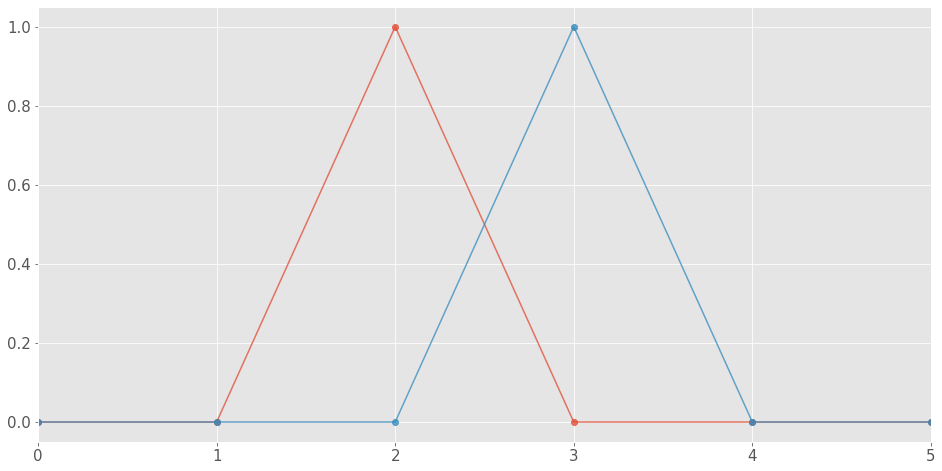

In [17]:
plt.plot(freq, np.abs(Y1), 'o-', alpha=0.75)
plt.plot(freq, np.abs(Y2), 'o-', alpha=0.75)
plt.xlim(0, 5)

---

### [PyFRF](https://github.com/openmodal/pyFRF)

``pyFRF`` is an open-source package, designed for frequency response function measurements in structural dynamics.

The inputs are time signals of excitation and response, the outputs are FRF estimators (H1, H2, Hv, Vector or ODS) and coherence.

In [18]:
import pyFRF

In [19]:
# measurement_dict = lvm_read.read('data/acceleration.lvm')
measurement_dict = lvm_read.read('data/acceleration_multi.lvm')

In [20]:
acceleration = measurement_dict[0]['data'][:, 2]
force = measurement_dict[0]['data'][:, 1]

sampling_frequency = 1/measurement_dict[0]['Delta_X'][0]

A direct way of computing the FRF estimates:

In [21]:
frf = pyFRF.FRF(sampling_freq=sampling_frequency, exc=force, resp=acceleration, 
          resp_type='a', exc_window='None', resp_window='None')

freq = frf.get_f_axis()
H1 = frf.get_FRF(type='H1')

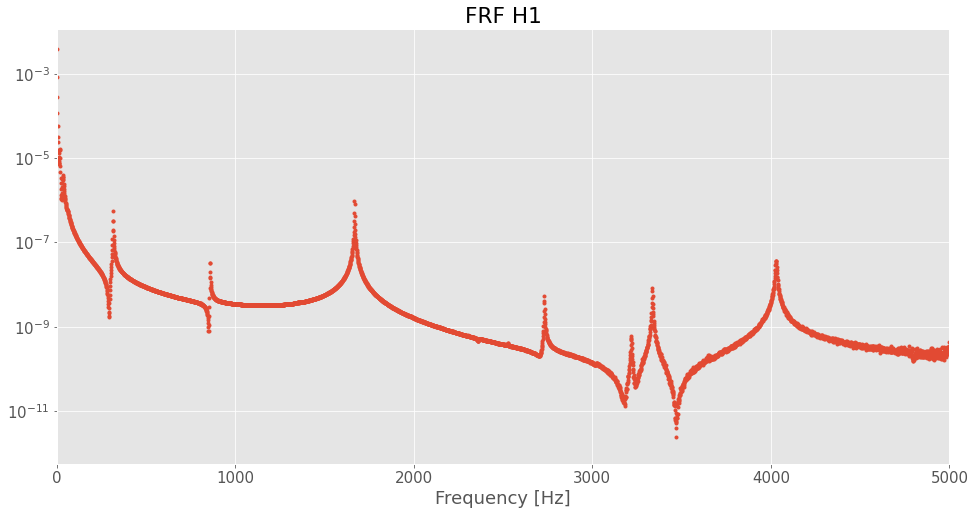

In [22]:
plt.semilogy(freq, np.abs(H1), '.')
plt.title('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 5000);

Different types of FRF:

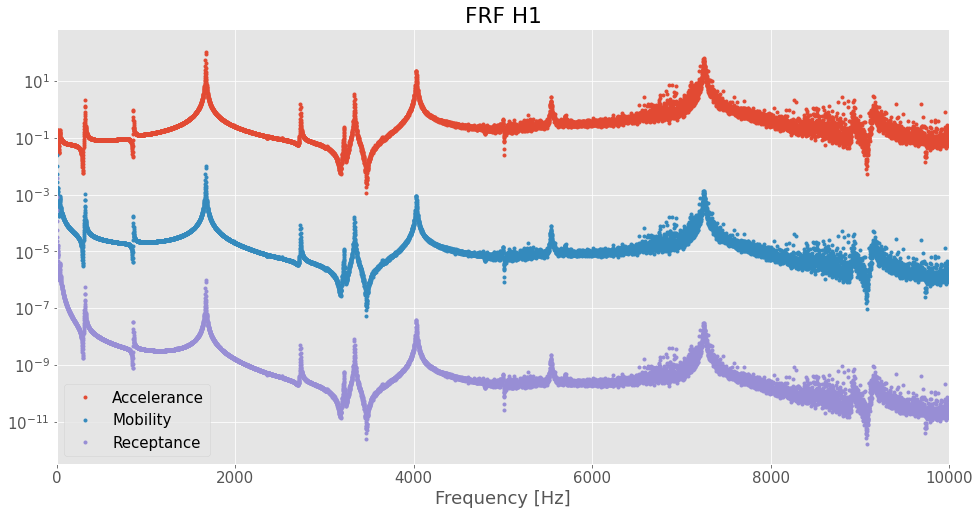

In [23]:
plt.semilogy(freq, np.abs(frf.get_FRF(form='accelerance')), '.', label='Accelerance')
plt.semilogy(freq, np.abs(frf.get_FRF(form='mobility')), '.', label='Mobility')
plt.semilogy(freq, np.abs(frf.get_FRF(form='receptance')), '.', label='Receptance')
plt.title('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 10000)
plt.legend();

`pyFRF` enables the averaging of multiple measurements:

In [24]:
n_averages = 3

In [25]:
FRF = pyFRF.FRF(sampling_freq=sampling_frequency, 
                n_averages=n_averages,
                fft_len=force.shape[0],
                exc_type='f', 
                resp_type='a')

The averages are added sequentially, the FRF estimate is updated with each iteration:

In [26]:
for i in range(n_averages):
    acceleration = measurement_dict[i]['data'][:, 2]
    force = measurement_dict[i]['data'][:, 1]

    FRF.add_data(force, acceleration)

In [27]:
freq_avg = frf.get_f_axis()
H1_avg = frf.get_FRF(type='H1')

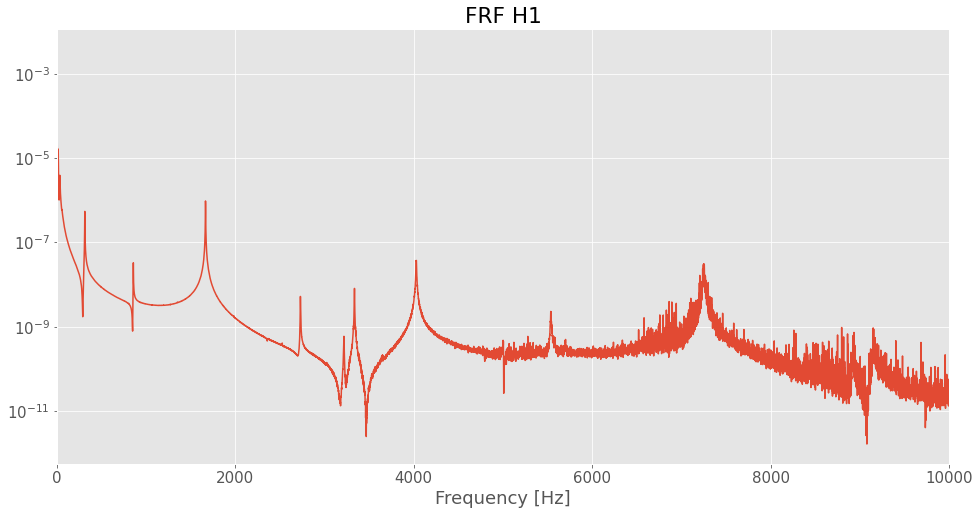

In [28]:
plt.semilogy(freq_avg, np.abs(H1_avg), '-')
plt.title('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 10000);

### [PyEMA](https://github.com/ladisk/pyEMA)

In [29]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

In [30]:
H1_main.shape

(6, 7, 9999)

From the experimental FRF array `H1_main` of dimensions: `(#inputs, #outputs, frequency)` only the response accelerometer position at index 1 will be used for analysis:

In [31]:
selected_response = 1
FRF = H1_main[:, selected_response, :]

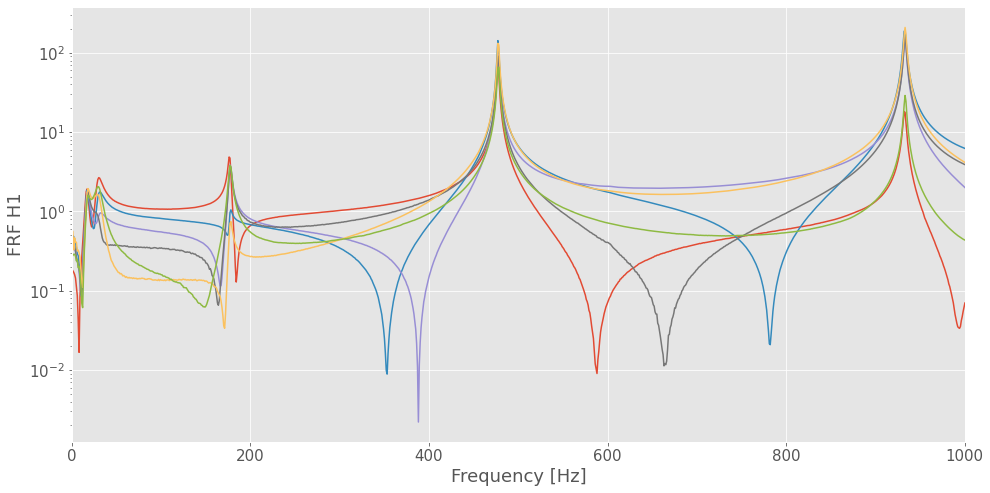

In [32]:
plt.semilogy(freq, np.abs(FRF.T));
plt.ylabel('FRF H1')
plt.xlabel('Frequency [Hz]')
plt.xlim(0, 1000);

Initiate the pyEMA object:

In [33]:
acc = pyEMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the complex system poles:

In [34]:
acc.get_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 181.72it/s]


Select stable poles from stabilisation chart:

In [35]:
acc.select_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 183.85it/s]


<Figure size 1152x576 with 0 Axes>



FRF reconstruction:


In [36]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')



The selected natural frequencies and corresponding damping factors:


In [37]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  476.5	0.0019
2)  932.2	0.0015
3) 1534.8	0.0020
4) 2286.3	0.0028
5) 3161.9	0.0018
6) 4181.4	0.0016


Modal constants are of shape (`n_locations` $\times$ `n_frequencies`):

In [38]:
acc.A.shape

(6, 6)

Show normalized modes (first three):

Text(0, 0.5, 'mode shape')

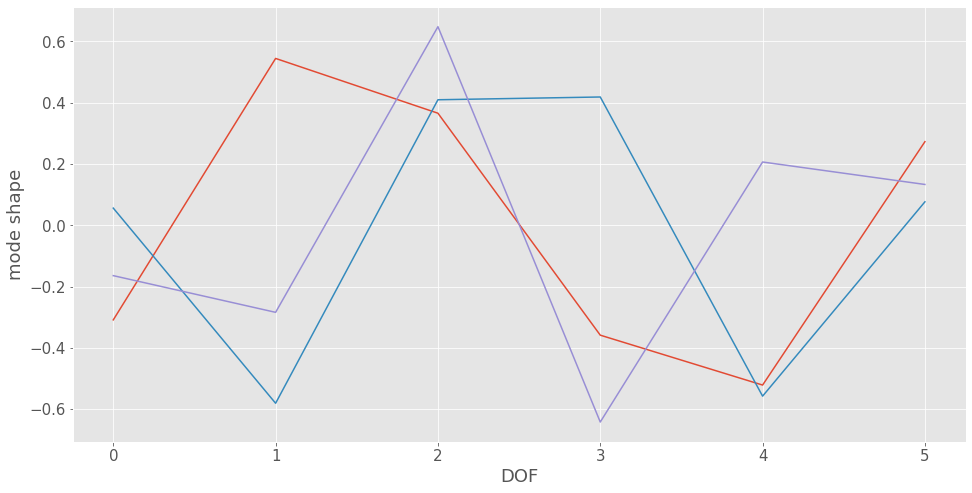

In [39]:
plt.plot(acc.normal_mode()[:, :3]);
plt.xlabel('DOF')
plt.ylabel('mode shape')

Check out the Auto Modal Assurance Criterion:

In [40]:
autoMAC = acc.autoMAC()

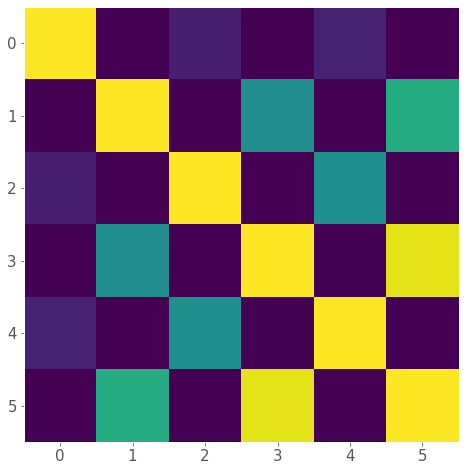

In [41]:
plt.figure(figsize=(8, 8))
plt.imshow(autoMAC)
plt.grid(False);



Showing the reconstructed FRF:


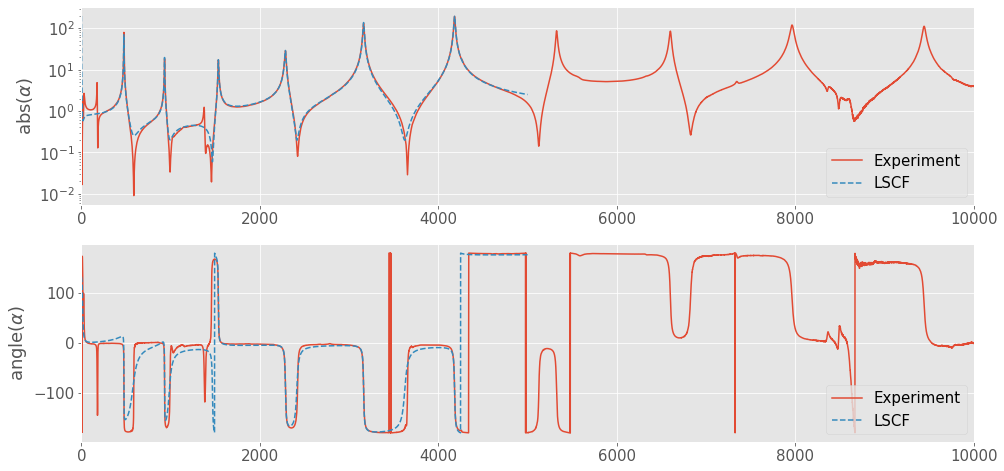

In [42]:
show_reconstructed(freq, acc, FRF, frf_rec)

### [PyIDI](https://github.com/ladisk/pyidi)

An Open-source package for Image-based Displacement Identification (IDI) implementation in Python.

Currently implements a Lucas-Kanade based DIC algorithm, and the [Simplified Optical Flow](http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=179) algorithm for image-based displacement identification.

Works with Photron MRAW high-speed imaging file format, but can easily be extended to different data structures.

Point to the location of image data:

In [43]:
cam_fname = 'data/camera.cih'

Create a `video` object:

In [44]:
video = pyidi.pyIDI(cam_fname)

The first frame of the video:

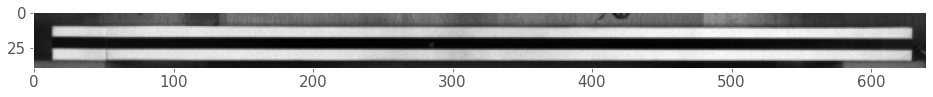

In [45]:
plt.imshow(video.mraw[0], 'gray')
plt.grid(False)

Define the point on the frame where the displacements will be identified:

In [46]:
points = [[25, 100], [25, 200]]

In [47]:
video.set_points(points)

Set the method of displacement identification:

In [48]:
video.set_method('sof')

Configure additional settings:

In [49]:
video.method.configure()

Compute the displacements:

In [50]:
disp = video.get_displacements()

100%|█████████████████████████████████████████████████████████| 3750/3750 [00:02<00:00, 1351.06it/s]


Displacements have a shape: (`n_locations`, `n_frames`, `2`):

In [51]:
disp.shape

(2, 3750, 2)

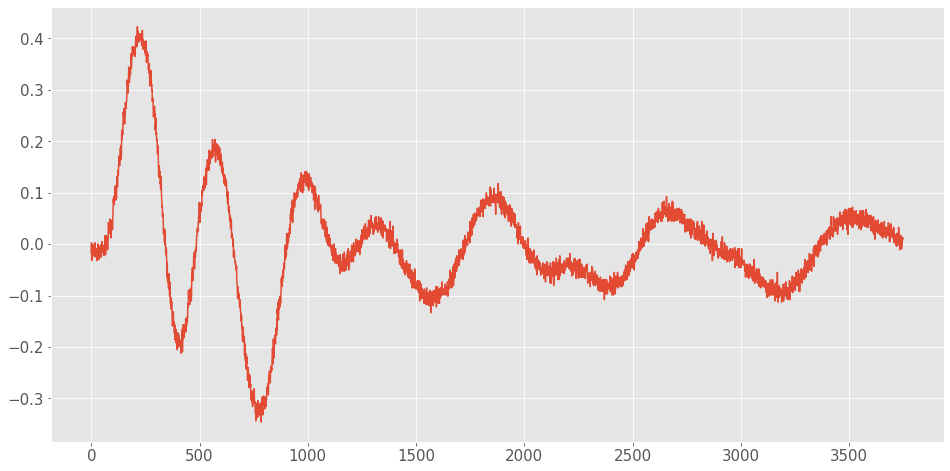

In [52]:
plt.plot(disp[1, :, 0])

### [FLife](https://github.com/ladisk/FLife)

### [PyUFF](https://github.com/openmodal/pyuff)

---

## High-speed camera measurements in structural dynamics

**Excitation with modal hammer**

<video controls loop src="figures/experiment.mp4" width="100%" rotate="270deg"/>

Location of the selected files:

In [53]:
cam_fname = 'data/camera.cih'
lvm_fname = 'data/acceleration.lvm'

Load the video using [pyidi][1] package.

[1]: https://github.com/ladisk/pyidi

In [54]:
video = pyidi.pyIDI(cam_fname)

Images are stored in the ``mraw`` attribute.

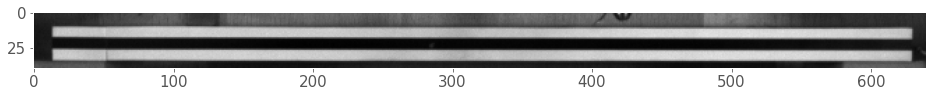

In [55]:
sequential_image_nr = 175
plt.imshow(video.mraw[sequential_image_nr], cmap='gray')
plt.grid(False)

*This example footage is for presentation purposes only and was made to be suitable for online sharing.*

*Normaly image acquisation parameters such as frame rate and image resolution would be chosen as high as possible to obtain more precise results.*

<video controls loop src="figures/video.MOV" width="950" rotate="270deg"/>

### Acquisition parameters

The parameters that were used when recording can be found in the ``info`` attribute:

In [56]:
video.info['Record Rate(fps)']

15000

In [57]:
video.info['Shutter Speed(s)']

'1/15371'

In [58]:
video.info['Image Width']

640

In [59]:
video.info['Image Height']

40

### Lighting
Lighting conditions are very important when using a high-speed camera. To obtain optimal lighting conditions, a histogram of pixel intensity is viewed. An example of a well balanced historgram is shown.

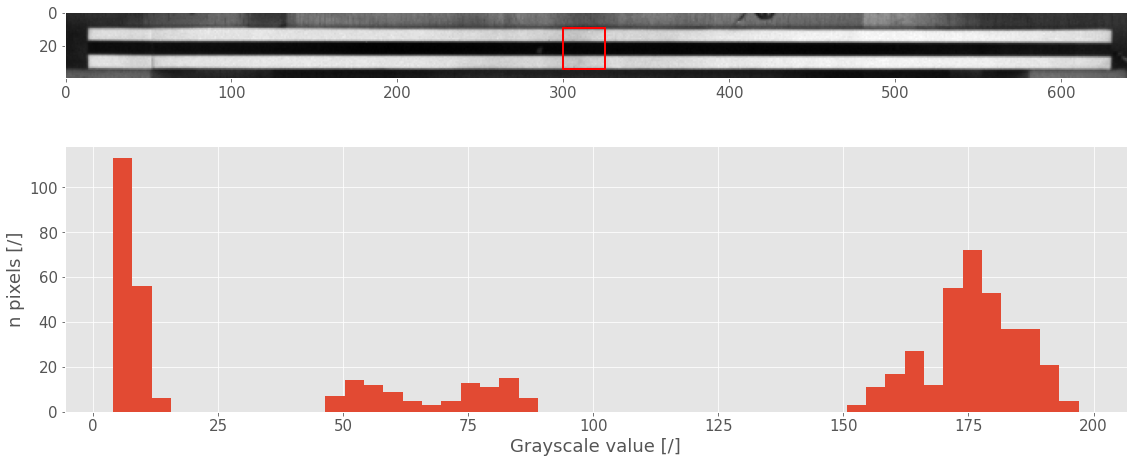

In [60]:
selected_frame = 0
x0 = 300 # position of observed rectangle
y0, d = 9, 25
roi = video.mraw[selected_frame, y0:y0+d, x0:x0+d]

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].hist(roi.flatten(), bins=50);
# Formating
ax[0].add_patch(patches.Rectangle((x0, y0), d, d, fill=False, color='r', linewidth=2))
ax[0].grid(False)
ax[1].set_xlabel('Grayscale value [/]')
ax[1].set_ylabel('n pixels [/]')
plt.tight_layout()

### Surface preperation
In order for gradient-based methods to work, sufficient gradient must be present on the images. Surface preperations is therefor necessary.

Stripe pattern and random speckle pattern generation is implemented in the [speckle-pattern][1] python module. In this case, horizontal stripes were used.

[1]: https://github.com/ladisk/speckle_pattern

In [61]:
grad0, grad1 = np.gradient(video.mraw[0].astype(float)) # gradient computation using Numpy

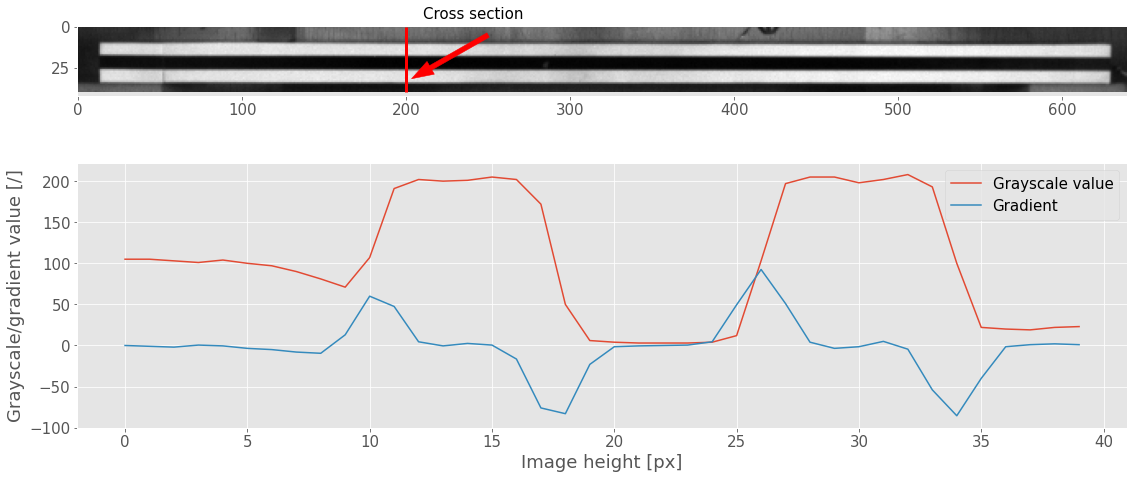

In [62]:
x0 = 200 # position of cross section

fig, ax = plt.subplots(2)
ax[0].imshow(video.mraw[selected_frame], cmap='gray')
ax[1].plot(video.mraw[selected_frame, :, x0], label='Grayscale value')
ax[1].plot(grad0[:, x0], label='Gradient')
# Formating
ax[0].vlines(x0, 0, 40, colors='r', linewidth=3)
ax[0].text(x0+10, -5, 'Cross section')
ax[0].arrow(x0+50, 5, -35, 20, color='r', width=3)
ax[0].grid(False)
ax[1].set_xlabel('Image height [px]')
ax[1].set_ylabel('Grayscale/gradient value [/]')
plt.legend()
plt.tight_layout()

### Possible errors

#### Out of focus image
The right side of the beam is in focus, while the left side is not.

In [63]:
layout_fname = r'data/focus.cih'
video_layout = pyidi.pyIDI(layout_fname)

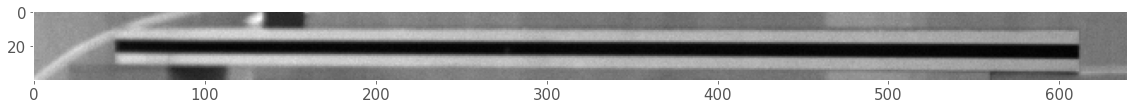

In [64]:
fig, ax = plt.subplots()
ax.imshow(video_layout.mraw[0], 'gray')

# Formating
ax.grid(False)
plt.tight_layout()

#### Improper lighting

In [65]:
light_fname = r'data/illumination.cih'
video_light = pyidi.pyIDI(light_fname)

In [66]:
interact(show_lighting, x0=(75, 550, 50), video_light=fixed(video_light));

interactive(children=(IntSlider(value=275, description='x0', max=550, min=75, step=50), Output()), _dom_classe…

---

## Real-life example of image-based vibration measurement

### Image-based displacement computation

We are using the high-speed video file, loaded above:

In [67]:
video.info

{'Date': '2018/12/17',
 'Time': '12:48',
 'Camera Type': 'FASTCAM SA-Z type 2100K-M-64GB',
 'Head Type': 'Unknown Child Device',
 'Camera ID': 11,
 'Camera Number': 0,
 'Head Number': 1,
 'Max Head Number': 1,
 'Scene Name': '',
 'User Defined Camera Name': '',
 'Session Number': '',
 'Date Record': 'Unknown',
 'Time Record': 'Unknown',
 'Trigger Time': 0,
 'Record Rate(fps)': 15000,
 'Shutter Speed(s)': '1/15371',
 'Trigger Mode': 'Start',
 'Original Total Frame': 7500,
 'Total Frame': 3750,
 'Start Frame': 0,
 'Correct Trigger Frame': 0,
 'Save Step': 1,
 'Image Width': 640,
 'Image Height': 40,
 'Color Type': 'Mono',
 'Color Bit': 8,
 'File Format': 'MRaw',
 'EffectiveBit Depth': 12,
 'EffectiveBit Side': 'Higher',
 'Digits Of File Number': 6,
 'Device Last Error': '-1:0xffffffff',
 'Comment Text': '',
 'AnalogBoard Channel Num': 0,
 'Zero Frame': 'Exist',
 'Shutter Type2(nsec)': 65060,
 'Edge Enhance': 0,
 'Pre LUT Mode': 'DEF1',
 'Pre LUT Brightness': 0,
 'Pre LUT Contrast': 0,
 '

Select the points to be analyzed:

In [68]:
video.info['Image Width']


640

In [69]:
points_y = np.ones(10)*video.info['Image Height']//2
points_x = np.arange(30, video.info['Image Width'], (video.info['Image Width']-60)//9)
points = np.column_stack([points_y, points_x])
points

array([[ 20.,  30.],
       [ 20.,  94.],
       [ 20., 158.],
       [ 20., 222.],
       [ 20., 286.],
       [ 20., 350.],
       [ 20., 414.],
       [ 20., 478.],
       [ 20., 542.],
       [ 20., 606.]])

Configure the analysis:

In [70]:
video.set_points(points)
video.set_method('lk', roi_size=(21, 23), max_nfev=10, int_order=3)

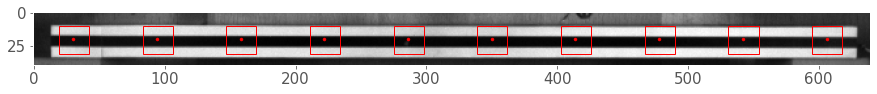

In [71]:
video.show_points()

Compute the displacements:

In [72]:
displacements = video.get_displacements(processes=4) * 8e-5 # this might take a minute

--- Starting new analysis ---
 
Computation start: 2020-12-21 10:18:17.242023


VBox()

Computation duration: 00:00:49.49


In [73]:
location = 0

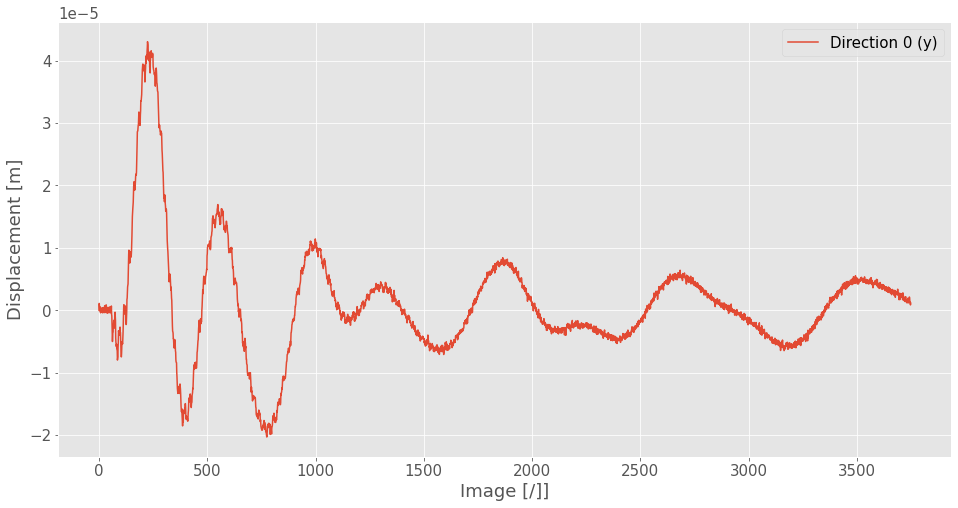

In [74]:
fig, ax = plt.subplots()
ax.plot(displacements[location, :, 0], label='Direction 0 (y)')
ax.set_xlabel('Image [/]]')
ax.set_ylabel('Displacement [m]')
plt.legend()

Compute the FRF using image-based displacement data

In [75]:
N = int(video.info['Total Frame'])
dt = 1/int(video.info['Record Rate(fps)'])
T = dt*N

In [76]:
upper_f_limit = 4000 # upper observed frequency

In [77]:
freq_cam = np.fft.rfftfreq(N, dt)
fft_cam = np.fft.rfft(displacements[:, :, 0], N) *2/N 

Use only data below the selected upper frequency:

In [78]:
fft_cam = np.copy(fft_cam[:, freq_cam<upper_f_limit])
freq_cam = np.copy(freq_cam[freq_cam<upper_f_limit])

The FFT of force measurement is (also limited to `upper_f_limit`):

In [79]:
lvm = lvm_read.read(lvm_fname)
force = lvm[0]['data'][:-30, 1] # 30 pre-samples
N = len(force)//4 # the video was captured for 1/4 of a second
dt = lvm[0]['Delta_X'][1]

fft_force = np.fft.rfft(force, N) *2/N
freq_force = np.fft.rfftfreq(N, dt)

fft_force = np.copy(fft_force[freq_force<upper_f_limit])
freq_force = np.copy(freq_force[freq_force<upper_f_limit])

Since only one measurement was used, the FRF is determined by:

In [80]:
frf_cam = fft_cam/fft_force 

Text(0, 0.5, 'Receptance FRF')

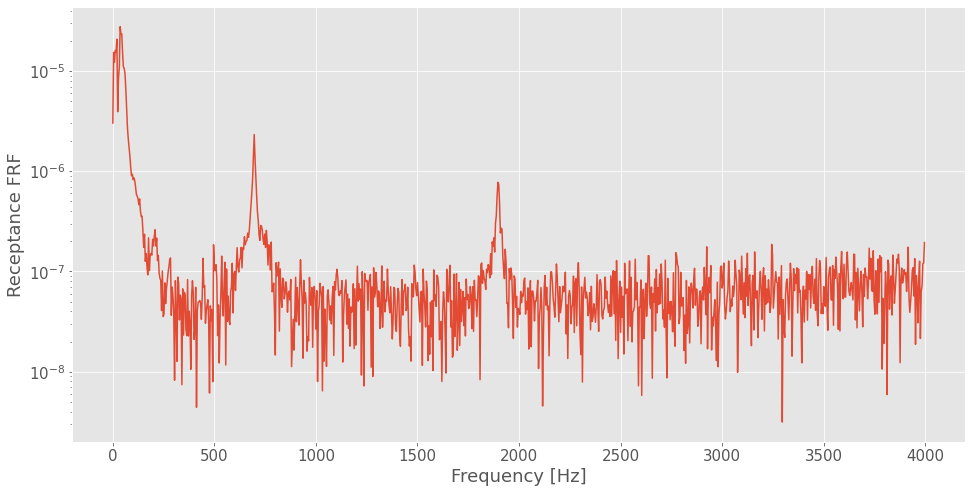

In [81]:
plt.semilogy(freq_cam, np.abs(frf_cam[location]));
plt.xlabel('Frequency [Hz]')
plt.ylabel('Receptance FRF')

### Modal Analysis - camera data, only

Modal analysis can be made using ``pyEMA`` package, accessible on [PyPI][1].

[1]: https://pypi.org/project/pyEMA/

In [102]:
cam = pyEMA.Model(frf_cam, freq_cam, pol_order_high=100, upper=upper_f_limit)

Poles are computed:

In [103]:
cam.get_poles(show_progress=True)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 59.93it/s]


Stable poles can be picked in the stability chart, or preditermind by passing in approximate natural frequencies (picking poles works only in the interactive mode, use magic command: %matplotlib qt).

In [104]:
cam.stab_chart(cam.all_poles)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 77.88it/s]


SHIFT + LEFT mouse button to pick a pole.
SHIFT + RIGHT mouse button to erase the last pick.
1. Frequency: ~698 -->	695.6766223528232 Hz	(xi = 0.0019)
2. Frequency: ~1905 -->	1897.5605171457214 Hz	(xi = 0.0005)
3. Frequency: ~2460 -->	2466.248504787951 Hz	(xi = -0.0015)


<Figure size 1152x576 with 0 Axes>

In [105]:
cam.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  695.7	0.0019
2) 1897.6	0.0005
3) 2466.2	-0.0015


After the stable poles are determind, a ``lsfd`` method can be called to reconstruct the FRF:

In [106]:
frf_rec, shapes_cam = cam.get_constants(FRF_ind='all')

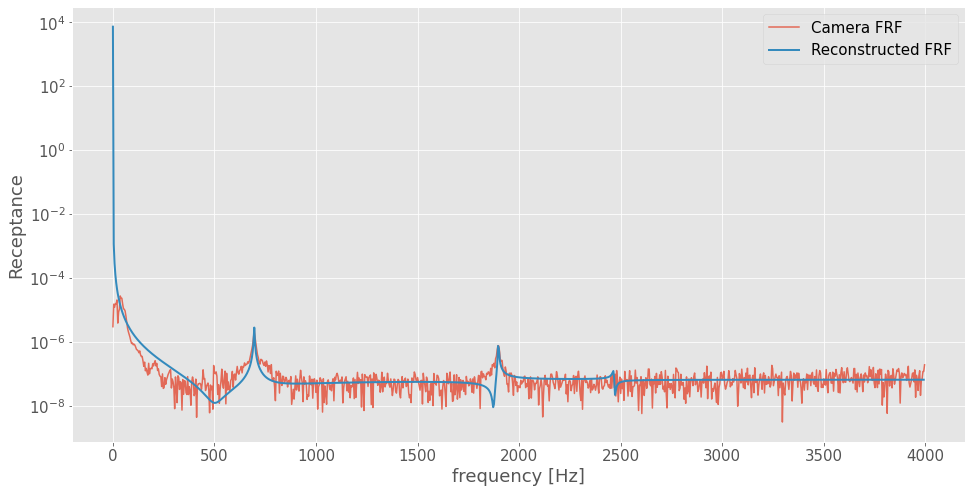

In [107]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_cam[:-1], np.abs(frf_rec[location]), label='Reconstructed FRF', lw=2)
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel('Receptance')
plt.legend();

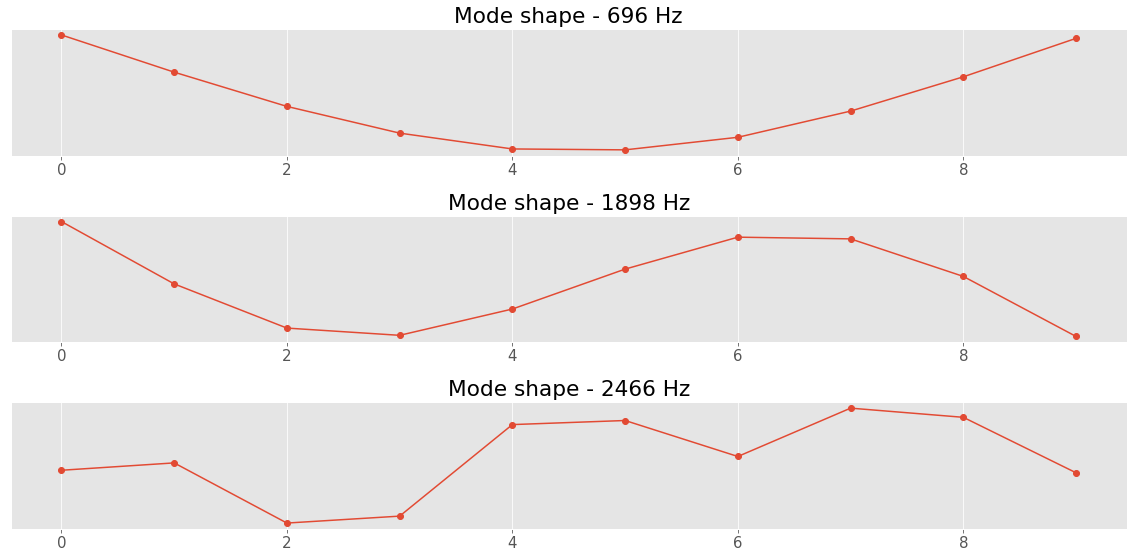

In [108]:
fig, ax = plt.subplots(shapes_cam.shape[1])
for i, a in enumerate(ax):
    plot_mode_shape(shapes_cam[:, i], axis=a, frequency=cam.nat_freq[i])

### Modal Analysis - Hybrid method

Hybrid method was developed by Javh et al. Further details can be found [here][1] ([pdf][2])

First, the acceleration and force data are needed:

[1]: https://www.sciencedirect.com/science/article/pii/S0888327017302637
[2]: http://lab.fs.uni-lj.si/ladisk/?what=abstract&ID=192

In [109]:
hyb_acc = lvm[0]['data'][:-30, 0] * 9.81 # acceleration data (converted to m/s**2)

The FRF can be computed using ``pyFRF``:

In [110]:
frf_ = pyFRF.FRF(
    sampling_freq=1/dt,
    exc=force,
    resp=hyb_acc,
    exc_window='None',
    resp_type='a',
    resp_window='None')

Only the frequencies lower than `upper_f_limit` Hz are observed:

In [111]:
freq_acc = frf_.get_f_axis()
frf_acc = frf_.get_FRF(form='receptance')

frf_acc = frf_acc[freq_acc<upper_f_limit]
freq_acc = freq_acc[freq_acc<upper_f_limit]

The location of acceleration measurement is at identified camera point with index 3:

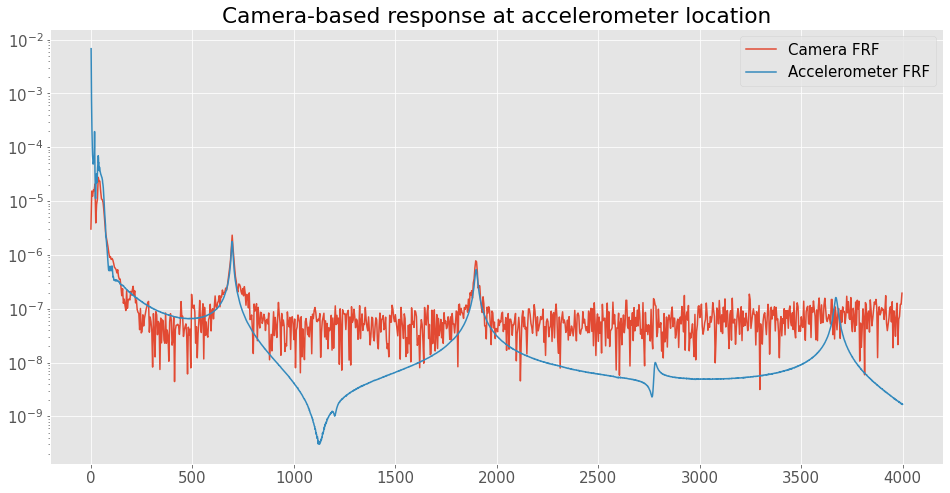

In [112]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF')
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.set_title('Camera-based response at accelerometer location')
plt.legend();

Next the ``lscf`` object can be created and poles are computed for the hybrid method:

In [113]:
acc = pyEMA.Model(frf_acc[1:], freq_acc[1:], pol_order_high=50, upper=upper_f_limit)

In [114]:
acc.get_poles(show_progress=True)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 352.13it/s]


In [115]:
acc.stab_chart(acc.all_poles)

100%|██████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 254.25it/s]


SHIFT + LEFT mouse button to pick a pole.
SHIFT + RIGHT mouse button to erase the last pick.
1. Frequency: ~698 -->	695.0150011629539 Hz	(xi = 0.0047)
2. Frequency: ~1915 -->	1914.5816036598412 Hz	(xi = -0.0330)
Deleting the last pick...
2. Frequency: ~1905 -->	1897.479181151665 Hz	(xi = 0.0031)
3. Frequency: ~2779 -->	2777.3639447755304 Hz	(xi = 0.0025)
4. Frequency: ~3681 -->	3671.1697179099965 Hz	(xi = 0.0020)


<Figure size 1152x576 with 0 Axes>

In [116]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  695.0	0.0047
2) 1897.5	0.0031
3) 2777.4	0.0025
4) 3671.2	0.0020


The poles computed based on accleration data are more reliable. These poles can now be used in reconstruction of FRFs from camera. A new ``lscf`` object is made with camera FRF:

In [117]:
cam_hyb = pyEMA.Model(frf_cam, freq_cam)

Next, the reconstruction is done using accleration-determined poles:

In [118]:
frf_hyb, shapes_hybrid = cam_hyb.get_constants(whose_poles=acc)

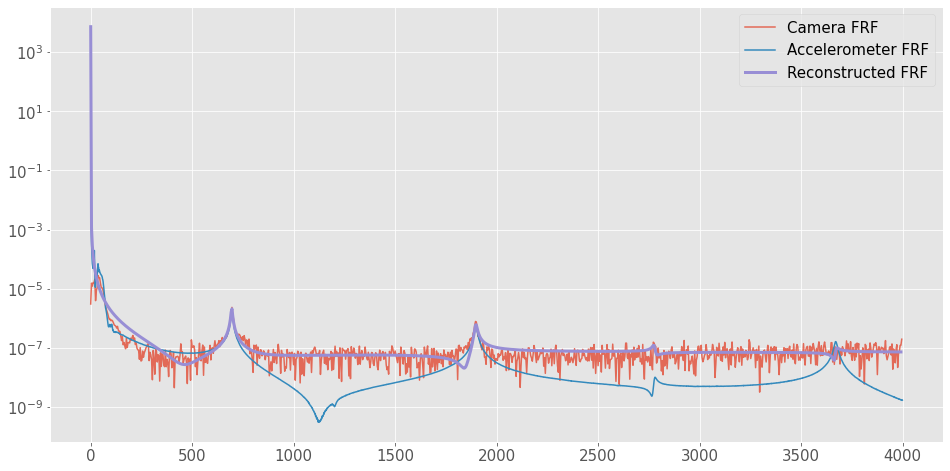

In [119]:
fig, ax = plt.subplots()
ax.semilogy(freq_cam, np.abs(frf_cam[location]), label='Camera FRF', alpha=0.8)
ax.semilogy(freq_acc, np.abs(frf_acc), label='Accelerometer FRF')
ax.semilogy(freq_cam[:-1], np.abs(frf_hyb[location]), label='Reconstructed FRF', lw=3)
plt.legend();

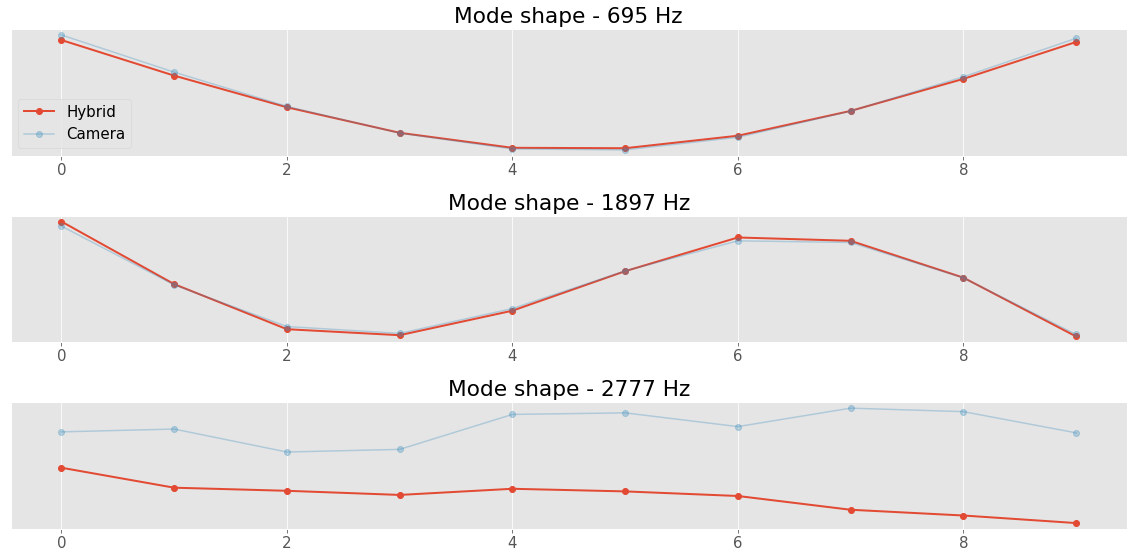

In [120]:
fig, ax = plt.subplots(shapes_cam.shape[-1])
for i, a in enumerate(ax):
    cam_freq = cam.nat_freq[i]
    hybrid_f_index = np.argmin(np.abs(acc.nat_freq - cam_freq))
    plot_mode_shape(shapes_hybrid[:, hybrid_f_index], axis=a, 
                    frequency=acc.nat_freq[hybrid_f_index], lw=2, label='Hybrid')
    plot_mode_shape(shapes_cam[:, i], axis=a , alpha=0.3, label='Camera')
    a.set_yticks([])
ax[0].legend()

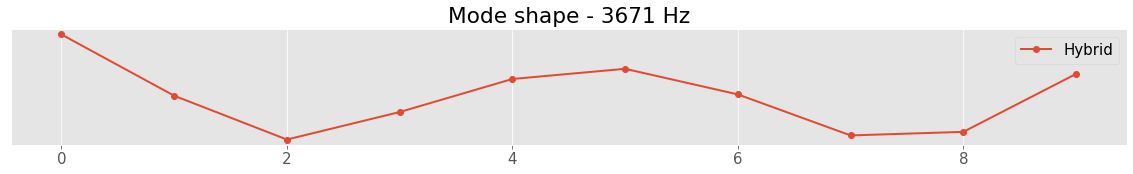

In [121]:
plt.figure(figsize=(fig_size[0], fig_size[1]/3))
plot_mode_shape(shapes_hybrid[:, -1], axis=plt.gca(), 
                frequency=acc.nat_freq[-1], lw=2, label='Hybrid')
plt.legend()

---

Interested in a potential summer school on open-source scientific computing?
http://tiny.cc/SummerInterest

<a href="http://tiny.cc/SummerInterest"><img src="figures/Summer School on High-speed Image Based Experimental Modal Analysis & Open Source Tools.png" width="90%"></a>
